<a href="https://colab.research.google.com/github/meghamkpatel/Skunks_Skool/blob/main/INFO_6105/AutoML/Red_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Science Engineering
##Assignment 2 - Red Wine Quality
*AutoML*
_______________________________________


###Background
to doooooo

##Goal

###Initializing H2O...

In [1]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 177.2 MB 44 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.1-py2.py3-none-any.whl size=177276478 sha256=6f27bb960593b4e736b978cdca893fd98f7157aab4ef244c78912d225ceb2d57
  Stored in directory: /root/.cache/pip/wheels/a1/a1/d9/bb37df368c4635a707e7362d1088450b606041f05aeba5f173
Successfully built h2o


In [2]:
%matplotlib inline
import random, os, sys
import h2o
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np

In [3]:
min_mem_size=6 
run_time=222

In [4]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [5]:
#installing dependencies
!pip install eli5
!pip install -q kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 8.4 MB/s 
     |████████████████████████████████| 133 kB 60.6 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=b250de1427109b340a3917fa8acc785837f848a45a14e8d580a1d1cb278b4144
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [6]:
#making a directory for kaggle api
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [7]:
#downloading and reading the red wine dataset
! kaggle datasets list -s 'red wine quality' # searching through kaggle with keyword 'red wine'
! kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009
!unzip red-wine-quality-cortez-et-al-2009.zip

ref                                                title                                      size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------  ----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
uciml/red-wine-quality-cortez-et-al-2009           Red Wine Quality                           26KB  2017-11-27 23:41:08         152201       2225  0.88235295       
ruthgn/wine-quality-data-set-red-white-wine        Wine Quality Data Set (Red & White Wine)   98KB  2021-11-03 01:26:46           1450         38  1.0              
yasserh/wine-quality-dataset                       Wine Quality Dataset                       21KB  2022-01-15 19:15:11          18427        454  1.0              
pritsheta/redwinequality                           RED-WINE-QUALITY                           26KB  2021-08-30 05:58:27            122         18  0.9705882        
piyushgoya

In [8]:
h2o.init(strict_version_check=False) # start h2o

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp2v59fkgd
  JVM stdout: /tmp/tmp2v59fkgd/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp2v59fkgd/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,1 month and 5 days
H2O_cluster_name:,H2O_from_python_unknownUser_vbpzj9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [9]:
# set this to True if interactive (matplotlib) plots are desired
interactive = True
if not interactive: matplotlib.use('Agg', warn=False)
import matplotlib.pyplot as plt

In [10]:
#Viewing data in the file 
data = h2o.import_file("winequality-red.csv")
data.shape
data.describe()
data.head()


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:1599
Cols:12

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,real,real,real,real,real,real,real,real,real,real,real,int
mins,4.6,0.12,0.0,0.9,0.012,1.0,6.0,0.99007,2.74,0.33,8.4,3.0
mean,8.31963727329581,0.5278205128205127,0.2709756097560977,2.53880550343965,0.08746654158849282,15.874921826141343,46.46779237023139,0.996746679174484,3.3111131957473416,0.6581488430268919,10.422983114446529,5.636022514071294
maxs,15.9,1.58,1.0,15.5,0.611,72.0,289.0,1.00369,4.01,2.0,14.9,8.0
sigma,1.7410963181276957,0.17905970415353537,0.1948011374053186,1.4099280595072798,0.0470653020100901,10.460156969809725,32.895324478299074,0.0018873339538425153,0.1543864649035426,0.16950697959010994,1.0656675818473942,0.8075694397347049
zeros,0,0,132,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5.0


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,5
7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7
7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5,7
7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5


In [33]:
train, test = data.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])


In [34]:
# assign target and inputs for logistic regression
y = 'quality'
X = [name for name in train.columns if name != y]
print(y)
print(X)

quality
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


###Regression

In [65]:
aml = H2OAutoML(max_runtime_secs=run_time,exclude_algos = ['DeepLearning'])

In [66]:
model_start_time = time.time()
  
try:
  aml.train(x=X,y=y,training_frame=train)  # Change training_frame=train
except Exception as e:
  logging.critical('aml.train') 
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()   
  sys.exit(4)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
aml2 = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "powerplant_full_data")
aml2.train(y = y, training_frame = data)

In [37]:
print(aml.leaderboard)

model_id                                                    rmse       mse       mae      rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_6_AutoML_2_20221025_24144  0.568018  0.322644  0.399842  0.087965                   0.322644
StackedEnsemble_BestOfFamily_4_AutoML_2_20221025_24144  0.571002  0.326044  0.394998  0.0882565                  0.326044
StackedEnsemble_AllModels_5_AutoML_2_20221025_24144     0.573293  0.328665  0.402066  0.0888504                  0.328665
StackedEnsemble_Best1000_1_AutoML_2_20221025_24144      0.573384  0.32877   0.41379   0.0888294                  0.32877
StackedEnsemble_AllModels_3_AutoML_2_20221025_24144     0.573986  0.32946   0.414235  0.088857                   0.32946
XGBoost_grid_1_AutoML_2_20221025_24144_model_6          0.580969  0.337525  0.393998  0.0896447                  0.337525
StackedEnsemble_BestOfFamily_3_AutoML_2_20221025_24144  0.58443   0.341559  0.414256  0.0907342                  0.341559
StackedEnsemble_AllModels_

In [ ]:
print(aml2.leaderboard)

###Answer Questions using Leading Model
 1. Is the relationship significant?
 

In [50]:
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])
best_model.algo

'stackedensemble'

In [39]:
best_model.r2(train=True)

0.9657638368026942

In [42]:
print(best_model.r2(valid=True))

None


In [40]:
print(best_model.r2(xval = True))

0.483772113987574


In [61]:
perf = aml.leader.model_performance(test)
perf

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.3577142657296839
RMSE: 0.598092188320232
MAE: 0.42493077173740496
RMSLE: 0.09336635200001922
Mean Residual Deviance: 0.3577142657296839
R^2: 0.4870148291918305
Null degrees of freedom: 393
Residual degrees of freedom: 388
Null deviance: 275.0595347876241
Residual deviance: 140.93942069749545
AIC: 727.0833880014079

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

In [68]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = se.metalearner()

In [69]:
metalearner.coef_norm()

{'Intercept': 5.629045643153521,
 'DRF_1_AutoML_5_20221025_35349': 0.39744796323621095,
 'XRT_1_AutoML_5_20221025_35349': 0.0,
 'GBM_5_AutoML_5_20221025_35349': 0.039939529355103046,
 'GBM_grid_1_AutoML_5_20221025_35349_model_7': 0.0,
 'GBM_grid_1_AutoML_5_20221025_35349_model_11': 0.0,
 'GBM_4_AutoML_5_20221025_35349': 0.0,
 'GBM_grid_1_AutoML_5_20221025_35349_model_18': 0.0,
 'GBM_grid_1_AutoML_5_20221025_35349_model_15': 0.0,
 'GBM_2_AutoML_5_20221025_35349': 0.0,
 'GBM_grid_1_AutoML_5_20221025_35349_model_19': 0.0012422200374260766,
 'GBM_3_AutoML_5_20221025_35349': 0.0,
 'GBM_grid_1_AutoML_5_20221025_35349_model_32': 0.0,
 'GBM_grid_1_AutoML_5_20221025_35349_model_33': 0.0,
 'GBM_grid_1_AutoML_5_20221025_35349_model_21': 0.0,
 'XGBoost_grid_1_AutoML_5_20221025_35349_model_13': 0.0,
 'GBM_grid_1_AutoML_5_20221025_35349_model_10': 0.0,
 'GBM_grid_1_AutoML_5_20221025_35349_model_3': 0.0,
 'GBM_grid_1_AutoML_5_20221025_35349_model_1': 0.0,
 'GBM_grid_1_AutoML_5_20221025_35349_model_4'

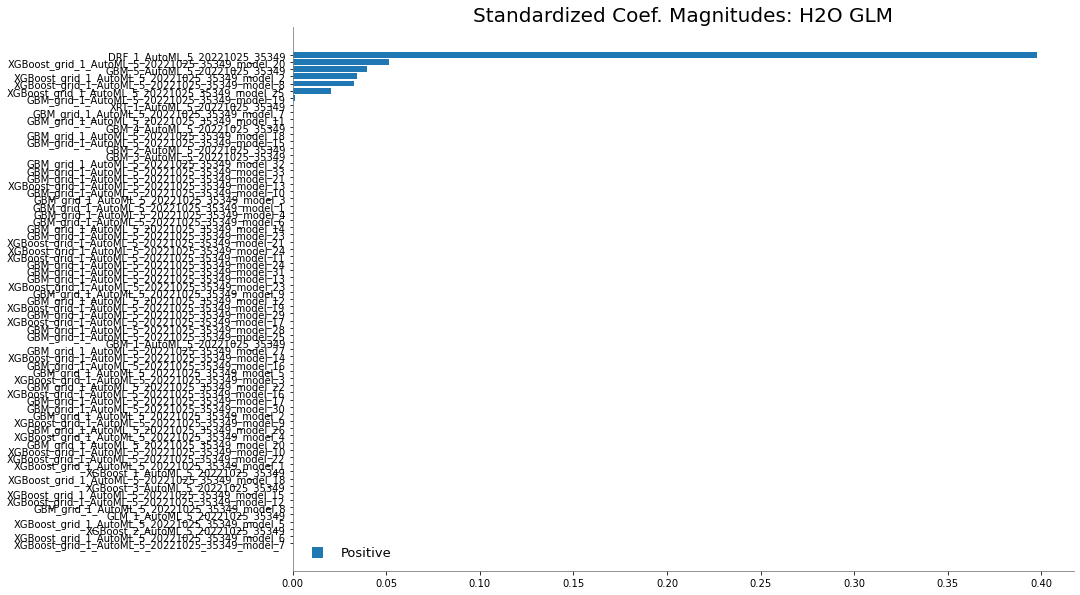

In [70]:
%matplotlib inline
metalearner.std_coef_plot()